In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import os
from sklearn.model_selection import train_test_split


In [59]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=28

In [60]:
for cate in os.listdir(DATADIR):
    if cate == 'testimg': continue
    CATEGORIES.append(cate)
print(CATEGORIES, len(CATEGORIES))

['blanco', 'verde', 'gris', 'negro', 'azul', 'amarillo', 'cafe', 'naranja', 'rosado', 'morado', 'rojo', 'celeste'] 12


In [61]:
training_data=[]
def create_training_data():
    labels=0
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        for fname in os.listdir(path):
            img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
            x = img_to_array(img)
            x=x/255
            training_data.append([x,labels])
        labels+=1
    print('done')
create_training_data()

/home/lenin/Apps/anaconda3/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


done


In [62]:
lenofimage = len(training_data)
print(lenofimage)

2400


In [63]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')

done


In [64]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (2400,)
img (2400, 28, 28, 3)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 1800, test: 600


In [115]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

In [97]:
# model.summary()

In [116]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=20)

Epoch 1/15
90/90 [==============================] - 2s 9ms/step - loss: 2.0689 - accuracy: 0.2839
Epoch 2/15
90/90 [==============================] - 1s 9ms/step - loss: 1.3261 - accuracy: 0.6150
Epoch 3/15
90/90 [==============================] - 1s 11ms/step - loss: 1.0398 - accuracy: 0.6906
Epoch 4/15
90/90 [==============================] - 1s 10ms/step - loss: 0.8155 - accuracy: 0.7417
Epoch 5/15
90/90 [==============================] - 1s 10ms/step - loss: 0.6452 - accuracy: 0.8039
Epoch 6/15
90/90 [==============================] - 1s 10ms/step - loss: 0.5612 - accuracy: 0.8078
Epoch 7/15
90/90 [==============================] - 1s 9ms/step - loss: 0.4532 - accuracy: 0.8433
Epoch 8/15
90/90 [==============================] - 1s 9ms/step - loss: 0.3871 - accuracy: 0.8572
Epoch 9/15
90/90 [==============================] - 1s 9ms/step - loss: 0.3311 - accuracy: 0.9033
Epoch 10/15
90/90 [==============================] - 1s 10ms/step - loss: 0.2977 - accuracy: 0.8978
Epoch 11/15
90

In [117]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.2889305055141449
test accuracy 0.9100000262260437


1/1 [==============================] - 0s 67ms/step
prediccion = morado


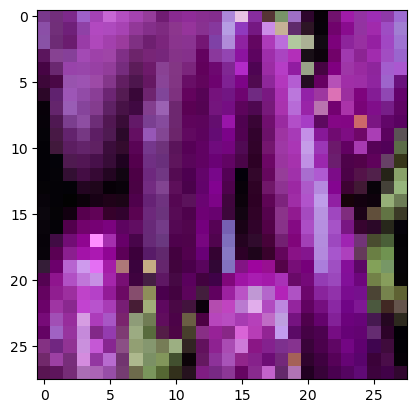

In [118]:
path = DATADIR + '/testimg' + '/61.jpg'
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255
x = x[np.newaxis, ...]
plt.imshow(img)
resp = model.predict(x)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

In [73]:
model.save('mod_color_v1.h5')